# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions

# Loading the data

In [2]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.iloc[:, :-1]
X_train = X[:-20]
X_test = X[-20:]
y = diabetes.iloc[:, -1] # the last column is the target
y_train = y[:-20]
y_test = y[-20:]

# Multiple Linear Regression Model

Coefficients: 
 [ 0.02239148  0.00581077 -0.00232574  0.00052319 -0.00019097  0.01298855
  0.14092583  0.00220817]
Mean squared error: 0.14
Coefficient of determination: 0.44


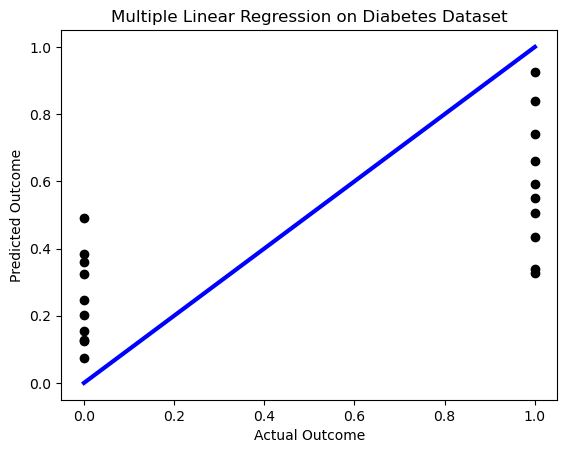

In [3]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
print('Coefficients: \n', mlr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred,  color='black')
plt.plot([0, 1], [0, 1], color='blue', linewidth=3)
plt.xlabel('Actual Outcome') # set the x-axis label
plt.ylabel('Predicted Outcome') # set the y-axis label
plt.title('Multiple Linear Regression on Diabetes Dataset') # set the plot title
plt.show()

# MLP Classifier Model

Confusion matrix: 
 [[9 1]
 [5 5]]


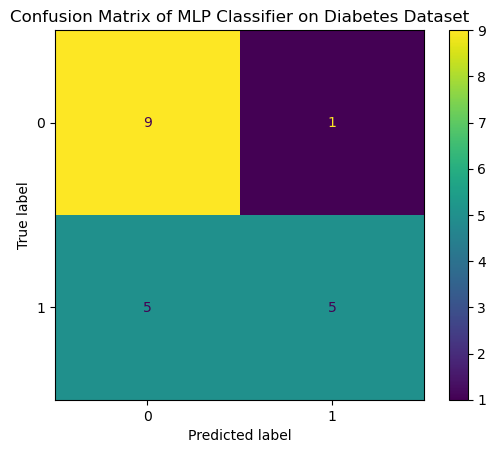

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix of MLP Classifier on Diabetes Dataset')
plt.show()

# ROC Curve of MLP Classifier on Diabetes Dataset

ROC AUC: 0.70


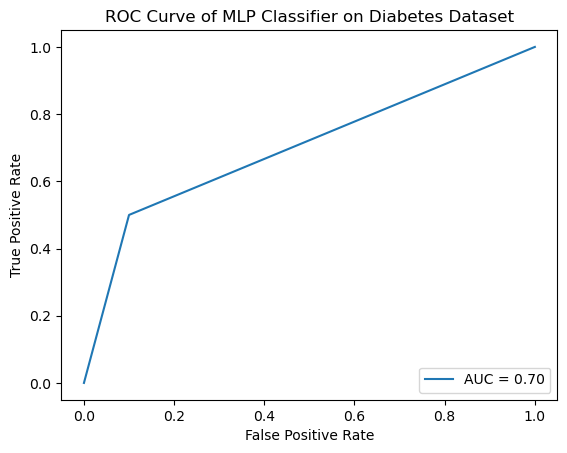

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('ROC AUC: %.2f' % roc_auc)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('ROC Curve of MLP Classifier on Diabetes Dataset')
plt.show()

# Decision Regions of MLP Classifier on Diabetes Dataset

C:\Users\Jinius\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


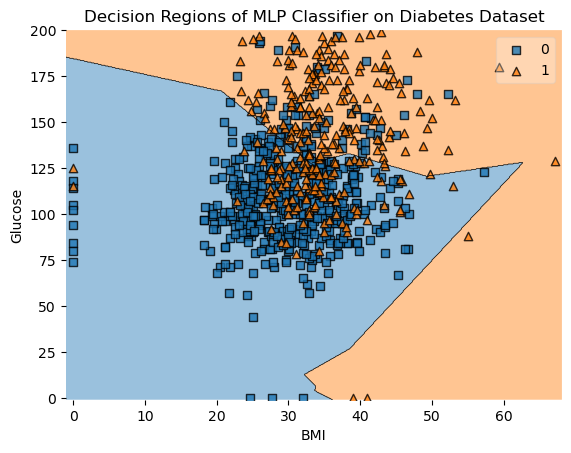

In [6]:
X_vis = X[['BMI', 'Glucose']].values
mlp.fit(X_train[['BMI', 'Glucose']], y_train)
plot_decision_regions(X=X_vis, y=y.values, clf=mlp)
plt.xlabel('BMI') # set the x-axis label
plt.ylabel('Glucose') # set the y-axis label
plt.title('Decision Regions of MLP Classifier on Diabetes Dataset') # set the plot title
plt.show()

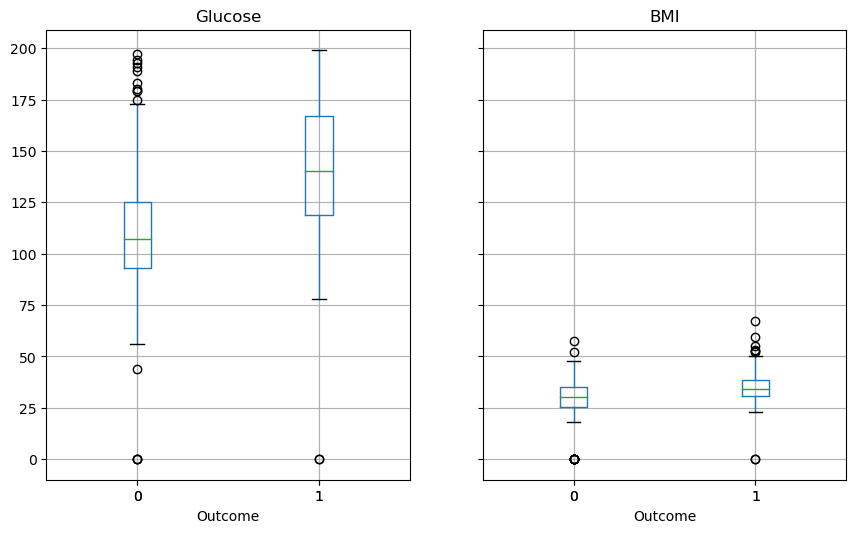

In [7]:
# Adding some tables and figures based on Glucose and BMI
# Table of descriptive statistics for Glucose and BMI by outcome
diabetes.groupby("Outcome")[["Glucose", "BMI"]].describe()
# Figure of boxplots for Glucose and BMI by outcome
diabetes.boxplot(column=["Glucose", "BMI"], by="Outcome", figsize=(10, 6))
plt.suptitle("")
plt.show()

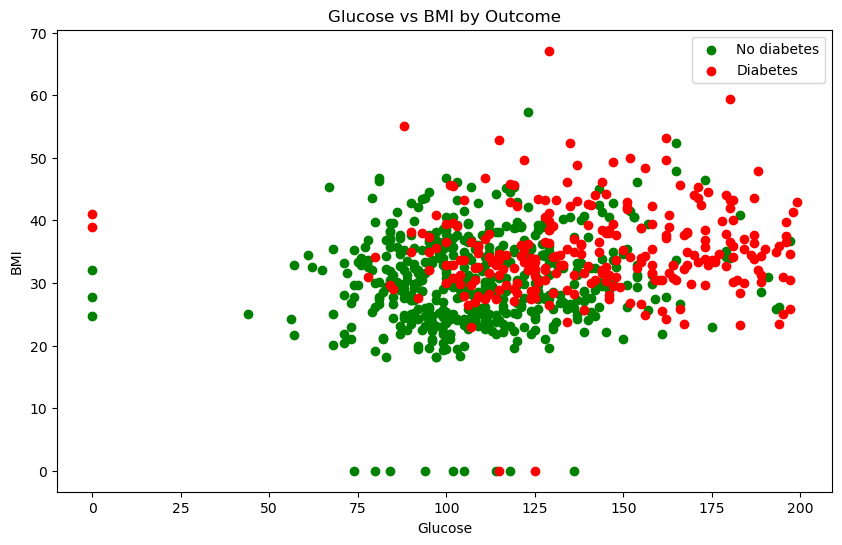

In [8]:
# Figure of scatter plot for Glucose vs BMI by outcome
plt.figure(figsize=(10, 6))
plt.scatter(diabetes[diabetes["Outcome"] == 0]["Glucose"], diabetes[diabetes["Outcome"] == 0]["BMI"], label="No diabetes", color="green")
plt.scatter(diabetes[diabetes["Outcome"] == 1]["Glucose"], diabetes[diabetes["Outcome"] == 1]["BMI"], label="Diabetes", color="red")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.title("Glucose vs BMI by Outcome")
plt.show()